In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [22]:
# 生成一些随机数据
n_samples = 100
data = torch.randn(n_samples, 2)  # 生成 100 个二维数据点
labels = (data[:, 0]**2 + data[:, 1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

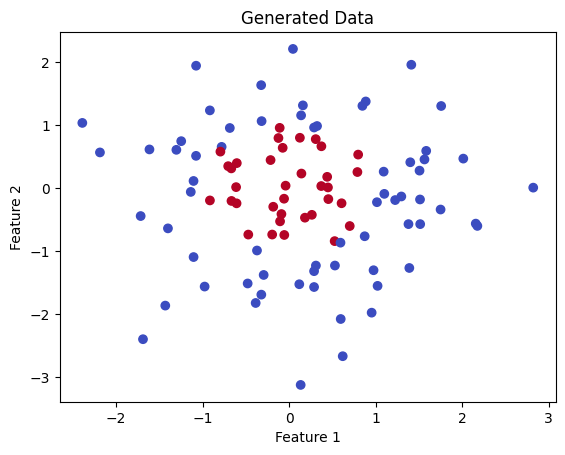

In [24]:
# 可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [26]:
# 定义前馈神经网络
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义神经网络的层
        self.fc1 = nn.Linear(2, 4)  # 输入层有 2 个特征，隐藏层有 4 个神经元
        self.fc2 = nn.Linear(4, 1)  # 隐藏层输出到 1 个神经元（用于二分类）
        self.sigmoid = nn.Sigmoid()  # 二分类激活函数

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.sigmoid(self.fc2(x))  # 输出层使用 Sigmoid 激活函数
        return x

In [28]:
# 实例化模型
model = SimpleNN()

# 定义损失函数和优化器
criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer = optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

In [30]:
# 训练
epochs = 100
for epoch in range(epochs):
    # 前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每 10 轮打印一次损失
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6374
Epoch [20/100], Loss: 0.6301
Epoch [30/100], Loss: 0.6248
Epoch [40/100], Loss: 0.6199
Epoch [50/100], Loss: 0.6150
Epoch [60/100], Loss: 0.6097
Epoch [70/100], Loss: 0.6039
Epoch [80/100], Loss: 0.5984
Epoch [90/100], Loss: 0.5926
Epoch [100/100], Loss: 0.5866


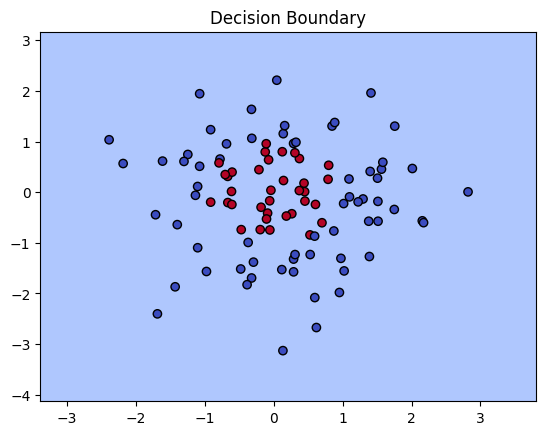

In [32]:
# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)